In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [7]:
data=pd.read_csv("C:/Users/DELL/archive (3)/heart.csv")
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
data=pd.get_dummies(data,columns=['cp'],drop_first=True)
data

,age,sex,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,cp_1,cp_2,cp_3
0,63,1,145,233,1,0,150,0,2.3,0,0,1,1,0,0,1
1,37,1,130,250,0,1,187,0,3.5,0,0,2,1,0,1,0
2,41,0,130,204,0,0,172,0,1.4,2,0,2,1,1,0,0
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1,1,0,0
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0.2,1,0,3,0,0,0,0
299,45,1,110,264,0,1,132,0,1.2,1,0,3,0,0,0,1
300,68,1,144,193,1,1,141,0,3.4,1,2,3,0,0,0,0
301,57,1,130,131,0,1,115,1,1.2,1,1,3,0,0,0,0


In [9]:
X = data[['age', 'sex']] 
y = data['chol']  


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [11]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
y_pred


array([302, 212, 234, 234, 234, 204, 204, 234, 197, 234, 234, 204, 212,
       204, 204, 204, 204, 204, 234, 204, 204, 204, 234, 197, 204, 197,
       204, 204, 204, 204, 234, 204, 204, 204, 204, 197, 302, 204, 197,
       197, 234, 197, 204, 204, 204, 302, 204, 204, 197, 204, 204, 302,
       204, 204, 204, 204, 204, 197, 234, 204, 197], dtype=int64)

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy*100:.2f}%")


Model Accuracy: 0.00%


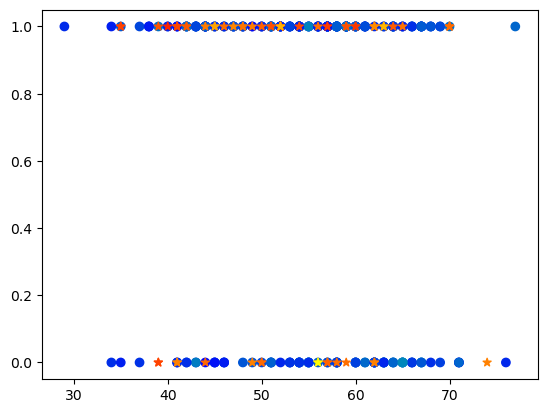

In [13]:
plt.scatter(X_train['age'], X_train['sex'], c=y_train, cmap='winter', label='Training Data')
plt.scatter(X_test['age'], X_test['sex'], c=y_test, cmap='autumn', marker='*', label='Test Data')
h = .02  # step size in the mesh
x_min, x_max = X['age'].min() - 1, X['age'].max() + 1
y_min, y_max = X['sex'].min() - 1, X['sex'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


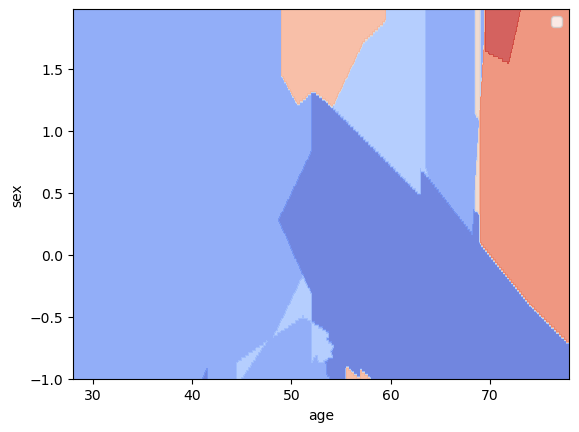

In [20]:
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.8)
plt.xlabel('age')
plt.ylabel('sex')
plt.legend()
plt.show()
